In [ ]:
import os
# !pip install tensorflow
# !pip install scikit-learn
# !pip install opencv-python
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
import pandas as pd


In [2]:
# Set the path to the root folder containing subfolders for each character
root_folder = 'D:\Personal\zDocuments\Lachu\Project_MSc\Data\Data Dumps\PREPROCESSING\TestFolder'
num_classes = len(os.listdir(root_folder))
num_classes

43

In [3]:
# Step 1: Read and Load the Data
def load_data(root_folder):
    data = []
    labels = []
    
    for char_folder in os.listdir(root_folder):
        char_path = os.path.join(root_folder, char_folder)
        for img_file in os.listdir(char_path):
            img_path = os.path.join(char_path, img_file)
            # Read the image with alpha channel (transparency)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            img = img/255
            img[img<1] = 0
            data.append(img)
            labels.append(char_folder)
    return np.array(data), np.array(labels)

In [4]:
# Step 2: Data Preprocessing
data, labels = load_data(root_folder)

# Label encode classes
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the dataset into training, validation and testing sets
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Further split the training set into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [5]:
# Print the number of images in each class
unique_classes, counts = np.unique(y_train, return_counts=True)

for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} images")

Class 0: 167 images
Class 1: 157 images
Class 2: 163 images
Class 3: 153 images
Class 4: 142 images
Class 5: 128 images
Class 6: 123 images
Class 7: 115 images
Class 8: 127 images
Class 9: 114 images
Class 10: 108 images
Class 11: 113 images
Class 12: 104 images
Class 13: 131 images
Class 14: 118 images
Class 15: 92 images
Class 16: 122 images
Class 17: 119 images
Class 18: 136 images
Class 19: 107 images
Class 20: 108 images
Class 21: 109 images
Class 22: 116 images
Class 23: 127 images
Class 24: 102 images
Class 25: 118 images
Class 26: 128 images
Class 27: 107 images
Class 28: 110 images
Class 29: 100 images
Class 30: 100 images
Class 31: 107 images
Class 32: 92 images
Class 33: 122 images
Class 34: 119 images
Class 35: 108 images
Class 36: 93 images
Class 37: 104 images
Class 38: 87 images
Class 39: 101 images
Class 40: 100 images
Class 41: 99 images
Class 42: 95 images


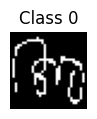

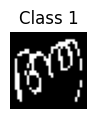

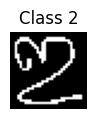

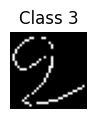

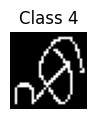

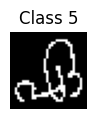

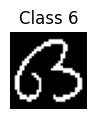

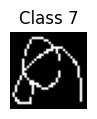

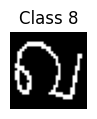

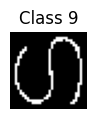

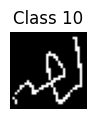

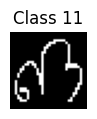

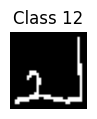

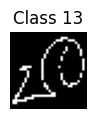

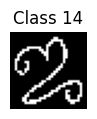

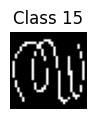

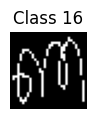

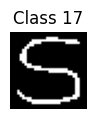

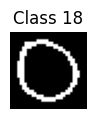

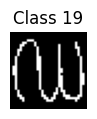

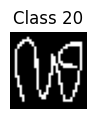

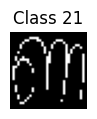

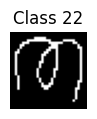

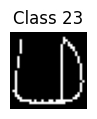

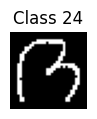

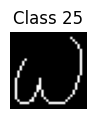

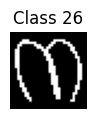

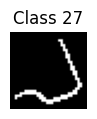

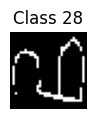

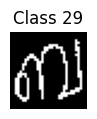

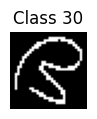

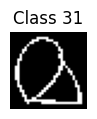

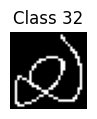

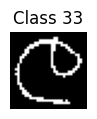

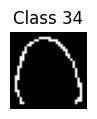

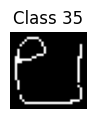

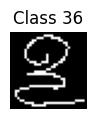

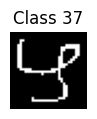

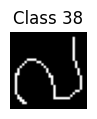

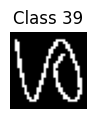

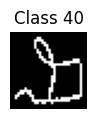

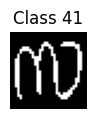

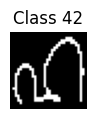

In [6]:
# Display the first image from each class
for cls in unique_classes:
    # Find the first image index of the current class
    idx = np.where(y_train == cls)[0][0]
    
    # Extract the image and display it
    image = X_train[idx]
    
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap='gray')  # Assuming grayscale images; adjust cmap if necessary
    plt.title(f'Class {cls}')  # Set title as the class label
    plt.axis('off')  # Turn off axis
    plt.show()

In [9]:
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

def build_lenet5():
    model = models.Sequential([
        # Layer 1: Convolutional Layer with 6 filters, 5x5 kernel, tanh activation, and 'valid' padding
        layers.Conv2D(6, (5, 5), activation='tanh', padding='valid', input_shape=(32, 32, 1)),
        # Layer 2: Average Pooling Layer with 2x2 pool size
        layers.AveragePooling2D((2, 2), strides=2, padding='valid'),
        # Layer 3: Convolutional Layer with 16 filters, 5x5 kernel, tanh activation, and 'valid' padding
        layers.Conv2D(16, (5, 5), activation='tanh', padding='valid'),
        # Layer 4: Average Pooling Layer with 2x2 pool size
        layers.AveragePooling2D((2, 2), strides=2, padding='valid'),
        # Layer 5: Convolutional Layer with 120 filters, 5x5 kernel, tanh activation, and 'valid' padding
        layers.Conv2D(120, (5, 5), activation='tanh', padding='valid'),
        # Flatten the output to feed into fully connected layers
        layers.Flatten(),
        # Layer 6: Fully Connected Layer with 84 units and tanh activation, with L2 regularization
        layers.Dense(84, activation='tanh', kernel_regularizer=l2(0.01)),  # L2 Regularization
        layers.Dropout(0.5),  # Dropout Layer with 50% dropout rate
        # Output Layer: Fully Connected Layer with num_classes units and softmax activation
        layers.Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01))  # L2 Regularization
    ])
    return model

model = build_lenet5()



In [10]:
# Step 4: Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# # Create an instance of the ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range=0,      # Randomly rotate images by 0 to 20 degrees
#     width_shift_range=0.05,  # Randomly shift images horizontally by up to 20% of the width
#     height_shift_range=0.05, # Randomly shift images vertically by up to 20% of the height
#     shear_range=0.1,        # Shear intensity (shear angle in radians)
#     zoom_range=0.1,         # Randomly zoom into images by up to 20%
#     horizontal_flip=False,   # Randomly flip images horizontally
#     vertical_flip=False,     # Randomly flip images vertically
#     fill_mode='nearest'     # Strategy for filling in newly created pixels (e.g., 'nearest')
# )

# # Create a flow from the training data and labels
# # This will generate augmented images on-the-fly during training
# augmented_data_generator = datagen.flow(X_train, y_train, batch_size=16)

# # Step 5: Train the Model
# # Now you can use augmented_data_generator as your training data in model.fit
# history = model.fit(augmented_data_generator, epochs=10, steps_per_epoch=len(X_train)//16, batch_size=32, validation_data=(X_val, y_val))

In [12]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/25


156/156 [==============================] - 13s 32ms/step - loss: 3.5654 - accuracy: 0.3659 - val_loss: 2.4911 - val_accuracy: 0.6289
Epoch 2/25
156/156 [==============================] - 3s 22ms/step - loss: 2.2556 - accuracy: 0.6614 - val_loss: 1.9776 - val_accuracy: 0.7423
Epoch 3/25
156/156 [==============================] - 3s 21ms/step - loss: 1.8779 - accuracy: 0.7489 - val_loss: 1.7587 - val_accuracy: 0.7787
Epoch 4/25
156/156 [==============================] - 3s 19ms/step - loss: 1.6750 - accuracy: 0.7956 - val_loss: 1.6206 - val_accuracy: 0.7955
Epoch 5/25
156/156 [==============================] - 3s 19ms/step - loss: 1.5576 - accuracy: 0.8263 - val_loss: 1.5340 - val_accuracy: 0.8179
Epoch 6/25
156/156 [==============================] - 3s 19ms/step - loss: 1.4647 - accuracy: 0.8513 - val_loss: 1.4602 - val_accuracy: 0.8333
Epoch 7/25
156/156 [==============================] - 3s 22ms/step - loss: 1.3895 - accuracy: 0.8718 - val_loss: 1.4146 - val_accuracy: 0.8

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Calculate accuracy for each character
accuracies = {}
for char_label in set(y_test):
    indices = (y_test == char_label)
    accuracies[char_label] = accuracy_score(y_test[indices], y_pred_classes[indices])

# Print accuracy for each character
for char_label, accuracy in accuracies.items():
    print(f'Character {char_label}: Test Accuracy = {accuracy:.4f}')

# Overall test accuracy
overall_test_loss, overall_test_acc = model.evaluate(X_test, y_test)
print(f'\nOverall Test Accuracy: {overall_test_acc:.4f}')


45/45 [==============================] - 1s 8ms/step
Character 0: Test Accuracy = 0.8966
Character 1: Test Accuracy = 0.9057
Character 2: Test Accuracy = 0.9778
Character 3: Test Accuracy = 0.9091
Character 4: Test Accuracy = 0.8605
Character 5: Test Accuracy = 0.8478
Character 6: Test Accuracy = 0.8837
Character 7: Test Accuracy = 0.9143
Character 8: Test Accuracy = 0.9333
Character 9: Test Accuracy = 1.0000
Character 10: Test Accuracy = 0.8611
Character 11: Test Accuracy = 0.9429
Character 12: Test Accuracy = 1.0000
Character 13: Test Accuracy = 0.9444
Character 14: Test Accuracy = 0.9211
Character 15: Test Accuracy = 0.8000
Character 16: Test Accuracy = 0.9688
Character 17: Test Accuracy = 0.9574
Character 18: Test Accuracy = 0.9706
Character 19: Test Accuracy = 0.8529
Character 20: Test Accuracy = 0.9394
Character 21: Test Accuracy = 0.9655
Character 22: Test Accuracy = 1.0000
Character 23: Test Accuracy = 0.9655
Character 24: Test Accuracy = 0.9286
Character 25: Test Accuracy = 0.

In [28]:
np.shape(y_pred_classes)

(1427,)

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

num_classes = y_pred.shape[1]  # Get number of classes from y_pred shape
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

top_k_accuracy = tf.keras.metrics.TopKCategoricalAccuracy(k=6)
top_k_accuracy.update_state(y_test_one_hot, y_pred)
print(f"Top-3 Accuracy: {top_k_accuracy.result().numpy():.4f}")

45/45 [==============================] - 0s 3ms/step
Top-3 Accuracy: 0.9937


In [ ]:
#  Top 2: 96.99, Top 3: 98.04// Top 4: 98.81// Top 5:99.23 

In [14]:
# Initialize a dictionary to store predicted classes and their counts for each true class
predicted_counts = {char_label: {} for char_label in set(y_test)}

# Count predictions for each true class
for true_label in set(y_test):
    true_indices = (y_test == true_label)
    predicted_labels = y_pred_classes[true_indices]
    
    unique_predicted, counts_predicted = np.unique(predicted_labels, return_counts=True)
    for pred_label, count in zip(unique_predicted, counts_predicted):
        predicted_counts[true_label][pred_label] = count

# Print predicted classes and their counts for each true class
for true_label in sorted(predicted_counts.keys()):
    print(f'True Character {true_label}:')
    for pred_label, count in predicted_counts[true_label].items():
        print(f'    Predicted as Character {pred_label}: {count} times')
    print()

True Character 0:
    Predicted as Character 0: 52 times
    Predicted as Character 1: 2 times
    Predicted as Character 11: 1 times
    Predicted as Character 14: 1 times
    Predicted as Character 16: 1 times
    Predicted as Character 19: 1 times

True Character 1:
    Predicted as Character 0: 2 times
    Predicted as Character 1: 48 times
    Predicted as Character 16: 2 times
    Predicted as Character 37: 1 times

True Character 2:
    Predicted as Character 2: 44 times
    Predicted as Character 14: 1 times

True Character 3:
    Predicted as Character 2: 1 times
    Predicted as Character 3: 30 times
    Predicted as Character 31: 1 times
    Predicted as Character 35: 1 times

True Character 4:
    Predicted as Character 4: 37 times
    Predicted as Character 5: 4 times
    Predicted as Character 22: 1 times
    Predicted as Character 31: 1 times

True Character 5:
    Predicted as Character 4: 7 times
    Predicted as Character 5: 39 times

True Character 6:
    Predicted a

In [15]:
# # Step 6: Evaluate the Model
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {test_acc}')

In [16]:
# Access accuracy values from the history object
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# df = pd.DataFrame({'Epoch': range(1, len(val_acc) + 1),'val_acc': val_acc, 'train_acc': train_acc, 'train_loss':train_loss, 'val_loss': val_loss})

# # Save dataframe to CSV
# df.to_csv('DN_1_noaug.csv', index=False)


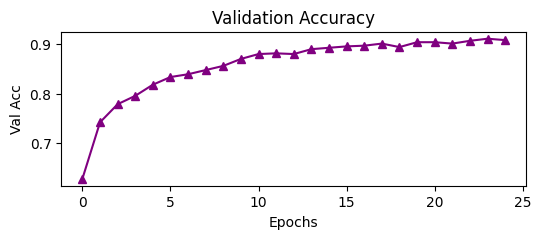

In [17]:
plt.rcParams["figure.figsize"] = (6,2)
plt.plot(val_acc,color='purple',marker='^')
# plt.legend(['Val Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Val Acc')
plt.title('Validation Accuracy')
plt.show()

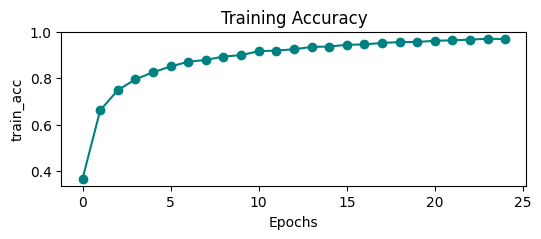

In [18]:
plt.rcParams["figure.figsize"] = (6,2)
plt.plot(train_acc,color='teal',marker='o')
# plt.legend(['Validation Loss Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('train_acc')
plt.title('Training Accuracy')
plt.show()